In [19]:
#include <iostream>
int main()
{
  std::cout << "Hello world" << std::endl;
  return 0;
}

Hello world


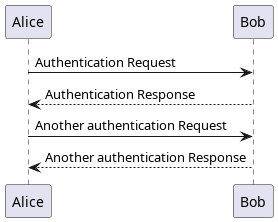

In [2]:
@startuml
Alice -> Bob: Authentication Request
Bob --> Alice: Authentication Response

Alice -> Bob: Another authentication Request
Alice <-- Bob: Another authentication Response
@enduml


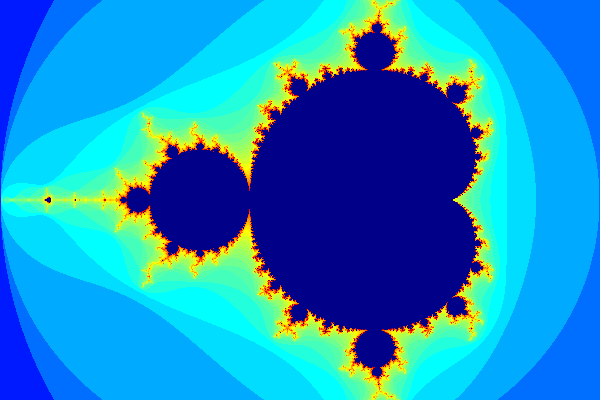

In [3]:
%OCTAVE
% Create a grid of points in the complex plane
x = linspace(-2, 1, 600);
y = linspace(-1, 1, 400);
[X, Y] = meshgrid(x, y);
C = X + Y*1i;

% Initialize the Mandelbrot set array and iteration parameters
M = zeros(size(C));
Z = zeros(size(C));
max_iter = 120;
escape_radius = 2;

% Iterate through the Mandelbrot function for each point
for iter = 1:max_iter
  Z = Z.^2 + C;
  M(abs(Z) > escape_radius & M == 0) = iter;
  Z(abs(Z) > escape_radius) = escape_radius;
end

% Apply logarithmic scaling for better contrast
M_log = log(1 + M);

% Create a colorful plot of the Mandelbrot set
fig = figure('visible', 'off');
colormap(jet(max_iter));
imagesc(x, y, M_log);
axis image;
xlabel('Re(C)');
ylabel('Im(C)');
title('Mandelbrot Set');

% Save the figure to stdout
temp_filename = [tempname(), '.svg'];
saveas(fig, temp_filename);
fwrite(1, uint8(fileread(temp_filename)));
delete(temp_filename);
